# Loan Repayment Challenge

At MoneyLion we are constantly working to assess the risk of our applicants more accurately. Being
successful in this objective enables us to better price customers and control losses on our portfolio of
loans.

Objective: To predict whether a given loan applicant will repay their loan

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Data Collection</li>
        <li>Data Understanding</li>
        <li>Data Preparation</li>
        <li>Modeling & Evaluation</li>
        <li>Conclusion</li>
    </ul>
</div>

<hr>

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

## Data Collection

Remark:

cuv = clarity underwriting variables

In [3]:
loan_file_path = r'C:\Users\Asus\Desktop\Data Scientist\data\loan.csv'
payment_file_path = r'C:\Users\Asus\Desktop\Data Scientist\data\payment.csv'
cuv_file_path = r'C:\Users\Asus\Desktop\Data Scientist\data\clarity_underwriting_variables.csv'

loan_data = pd.read_csv(loan_file_path)
payment_data = pd.read_csv(payment_file_path)
cuv_data = pd.read_csv(cuv_file_path)

## Data Understanding

In [4]:
print("Loan Data:")
print(loan_data.head())

print("\nPayment Data:")
print(payment_data.head())

print("\nClarity Underwriting Variables Data:")
print(cuv_data.head())

Loan Data:
          loanId                          anon_ssn payFrequency    apr  \
0  LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.0   
1  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2  LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.0   
3  LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.0   
4  LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.0   

              applicationDate  originated              originatedDate  \
0  2016-02-23T17:29:01.940000       False                         NaN   
1  2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2  2016-08-01T13:51:14.709000       False                         NaN   
3  2015-08-06T23:58:08.880000       False                         NaN   
4  2016-06-05T22:31:34.304000       False                         NaN   

   nPaidOff  approved  isFunded             loanStatus  loanAmount  \
0       0.0     False         0  Wi

In [5]:
print("Loan Data:")
print(loan_data.describe())

print("\nPayment Data:")
print(payment_data.describe())

print("\nClarity Underwriting Variables Data:")
print(cuv_data.describe())

Loan Data:
                 apr       nPaidOff       isFunded     loanAmount  \
count  573760.000000  577658.000000  577682.000000  575432.000000   
mean      553.080972       0.037887       0.067480     514.245084   
std       110.046159       0.333366       0.250852     320.939929   
min         0.000000       0.000000       0.000000       0.000000   
25%       490.000000       0.000000       0.000000     350.000000   
50%       590.000000       0.000000       0.000000     500.000000   
75%       601.000000       0.000000       0.000000     500.000000   
max       705.590000      21.000000       1.000000    5000.000000   

       originallyScheduledPaymentAmount       leadCost          hasCF  
count                     577682.000000  577682.000000  577682.000000  
mean                        1428.897209       7.854389       0.619187  
std                          925.009141      12.853451       0.485587  
min                         -816.710000       0.000000       0.000000  
25%    

In [6]:
print(loan_data.info())
print("\n")
print(payment_data.info())
print("\n")
print(cuv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

In [7]:
print(loan_data.isnull().sum())
print("\n")
print(payment_data.isnull().sum())
print("\n")
print(cuv_data.isnull().sum())

loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64


loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0


### Number of loan applications per year

In [8]:
loan_data['Year'] = loan_data['applicationDate'].astype(str).str[:4]
application_value_counts = loan_data['Year'].value_counts()
print(application_value_counts)

Year
2016    318865
2017    131881
2015    126189
2014       747
Name: count, dtype: int64


### Approval rate

In [9]:
approved_value_counts = loan_data['approved'].value_counts()
approved_percentage = loan_data['approved'].value_counts(normalize=True) * 100

result = pd.DataFrame({'Count': approved_value_counts, 'Percentage (%)': approved_percentage})

print(result)

           Count  Percentage (%)
approved                        
False     537646       93.069543
True       40036        6.930457


### Loan Status Overview

In [10]:
# Check the approval status of applications with missing values in 'loanStatus'.
missing_loan_status = loan_data[loan_data['loanStatus'].isnull()]
approved_status_count = missing_loan_status['approved'].value_counts()
print(approved_status_count)


approved
False    391
Name: count, dtype: int64


In [11]:
# Fill missing values with 'Not approved' 
loan_data['loanStatus'].fillna('Not approved', inplace=True)

In [12]:
loan_data['loanStatus'].value_counts()

loanStatus
Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Not approved                      391
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Application                 4
Pending Rescind                     4
Voided New Loan                     2
Charged Off                         1
Customver Voided New Loan           1
Settlement Pending Paid Off         1
Name: count, dtype: int64

## Data Preparation

### Loan Data

In [13]:
# Filter the funded loan before merging with payment and csv data
funded_loan_data = loan_data[loan_data['isFunded'] == 1]

# Check Loan Status Overview after filtering
funded_loan_data['loanStatus'].value_counts()

loanStatus
Paid Off Loan                  11427
External Collection            11334
New Loan                        8112
Internal Collection             5564
Returned Item                   1182
Settlement Paid Off              708
Settled Bankruptcy               325
Pending Paid Off                 169
Charged Off Paid Off             159
Charged Off                        1
Settlement Pending Paid Off        1
Name: count, dtype: int64

In [14]:
#Create a loan repayment outcome label from loanStatus
positive_loan = ['Paid Off Loan', 'New Loan', 'Returned Item', 'Pending Paid Off', 'Charged Off Paid Off']
negative_loan = ['External Collection', 'Internal Collection','Settlement Paid Off','Settled Bankruptcy','Charged Off','Settlement Pending Paid Off']

funded_loan_data['loan_repayment_outcome'] = funded_loan_data['loanStatus'].apply(lambda x: 1 if x in positive_loan else 0)
funded_loan_data[['loanStatus','loan_repayment_outcome']].head()

,loanStatus,loan_repayment_outcome
1,Paid Off Loan,1
15,New Loan,1
33,New Loan,1
47,Paid Off Loan,1
54,Paid Off Loan,1


### Payment Data
The relationship between loan data and payment data is **one-to-many**. 
To avoid duplicating loan records during data joins, I will perform feature engineering on the payment data to extract meaningful aggregated features.

In [15]:
# Total payments made
total_payments_made = payment_data[payment_data['paymentStatus'] == 'Checked'].groupby('loanId')['paymentAmount'].sum().reset_index(name='totalPaymentsMade')

# Total payments attempts
total_payments_attempts = payment_data.groupby('loanId').size().reset_index(name='totalPaymentsAttempts')

# Number of successful payment
number_successful_payment = payment_data[payment_data['paymentStatus'] == 'Checked'].groupby('loanId').size().reset_index(name='numberSuccessfulPayment')

# Number of custom made collection plan
number_collection_plan = payment_data[payment_data['isCollection'] == True].groupby('loanId').size().reset_index(name='numberCollectionPlan')

### Final Data

For **cuv_data**, I will take only the **clearfraudscore** as I assume that it is derived from the other underwriting variables. 

In [16]:
loan_payment = pd.merge(funded_loan_data, total_payments_made, on='loanId', how='left')
loan_payment = pd.merge(loan_payment, total_payments_attempts, on='loanId', how='left')
loan_payment = pd.merge(loan_payment, number_successful_payment, on='loanId', how='left')
loan_payment_merged = pd.merge(loan_payment, number_collection_plan, on='loanId', how='left')

cuv_data_cleaned = cuv_data[['underwritingid','clearfraudscore']]
final_data = pd.merge(loan_payment_merged, cuv_data_cleaned, left_on='clarityFraudId', right_on='underwritingid', how='left')
final_data.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,clarityFraudId,hasCF,Year,loan_repayment_outcome,totalPaymentsMade,totalPaymentsAttempts,numberSuccessfulPayment,numberCollectionPlan,underwritingid,clearfraudscore
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,569eb3a3e4b096699f685d64,1,2016,1,6287.08,25.0,22.0,NaN,569eb3a3e4b096699f685d64,879.0
1,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,True,2016-11-29T20:30:40.640000,2.0,True,1,...,NaN,0,2016,1,481.39,13.0,7.0,NaN,NaN,NaN
2,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,...,58b6eef8e4b0b6fca82fd426,1,2017,1,NaN,26.0,NaN,NaN,58b6eef8e4b0b6fca82fd426,658.0
3,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,...,58450a15e4b0bb9d6d7344c7,1,2017,1,1333.75,13.0,1.0,NaN,58450a15e4b0bb9d6d7344c7,835.0
4,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,...,578f9346e4b0810ad5e7b72e,1,2016,1,2432.08,13.0,13.0,NaN,578f9346e4b0810ad5e7b72e,624.0


In [17]:
final_data.isnull().sum()

loanId                                  0
anon_ssn                                0
payFrequency                            0
apr                                     0
applicationDate                         0
originated                              0
originatedDate                          0
nPaidOff                               21
approved                                0
isFunded                                0
loanStatus                              0
loanAmount                              0
originallyScheduledPaymentAmount        0
state                                   0
leadType                                0
leadCost                                0
fpStatus                                9
clarityFraudId                       6622
hasCF                                   0
Year                                    0
loan_repayment_outcome                  0
totalPaymentsMade                    7140
totalPaymentsAttempts                 104
numberSuccessfulPayment           

In [18]:
# Handle missing value

# 1. nPaidOff
final_data['nPaidOff'].fillna(0, inplace=True)

# 2. fpStatus
final_data['fpStatus'].fillna('None', inplace=True)

# 3. totalPaymentsMade
final_data['totalPaymentsMade'].fillna(0, inplace=True)

# 4. totalPaymentsAttempts
final_data['totalPaymentsAttempts'].fillna(0, inplace=True)

# 5. numberSuccessfulPayment
final_data['numberSuccessfulPayment'].fillna(0, inplace=True)

# 6. numberCollectionPlan
final_data['numberCollectionPlan'].fillna(0, inplace=True)

# 7. clearfraudscore
final_data['clearfraudscore'].fillna(0, inplace=True)


In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loanId                            38982 non-null  object 
 1   anon_ssn                          38982 non-null  object 
 2   payFrequency                      38982 non-null  object 
 3   apr                               38982 non-null  float64
 4   applicationDate                   38982 non-null  object 
 5   originated                        38982 non-null  bool   
 6   originatedDate                    38982 non-null  object 
 7   nPaidOff                          38982 non-null  float64
 8   approved                          38982 non-null  bool   
 9   isFunded                          38982 non-null  int64  
 10  loanStatus                        38982 non-null  object 
 11  loanAmount                        38982 non-null  float64
 12  orig

In [20]:
#final_data.to_csv("final_loan_data.csv", index=False)

### Visualizations for EDA

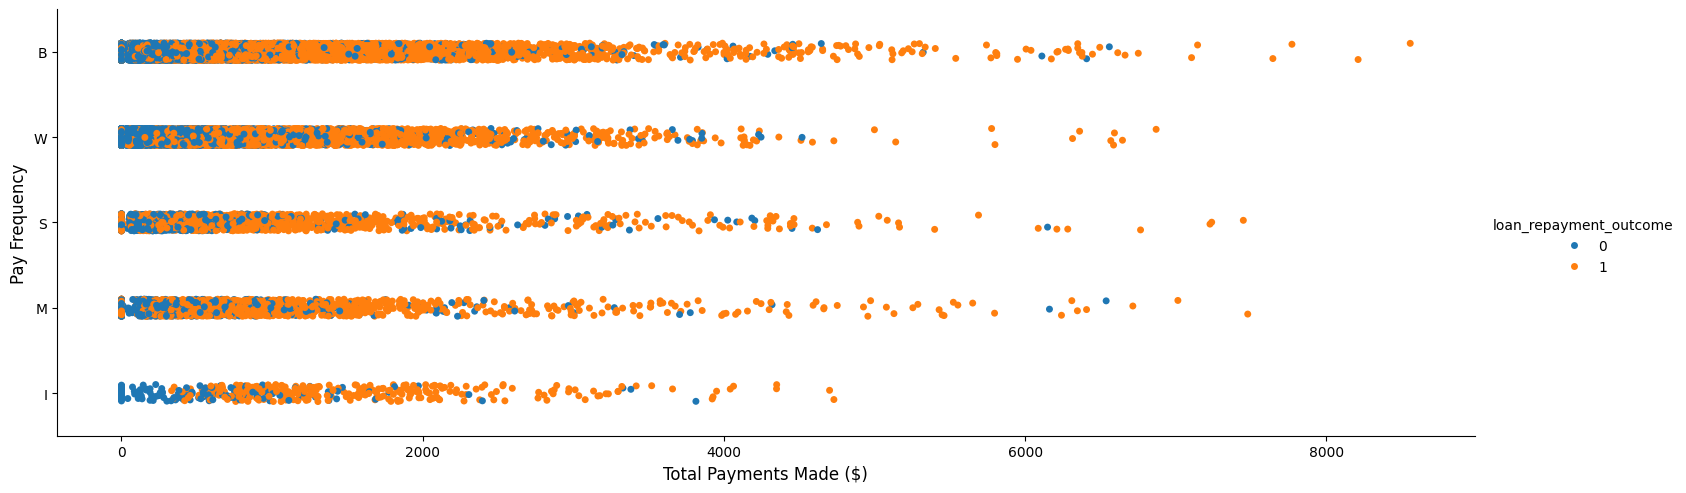

In [21]:
# Visualize the relationship between Total Payments Made and Pay Frequency

sns.catplot(y="payFrequency", x="totalPaymentsMade", hue="loan_repayment_outcome", data=final_data, aspect = 3)
plt.xlabel("Total Payments Made ($)",fontsize=12)
plt.ylabel("Pay Frequency",fontsize=12)
plt.show()

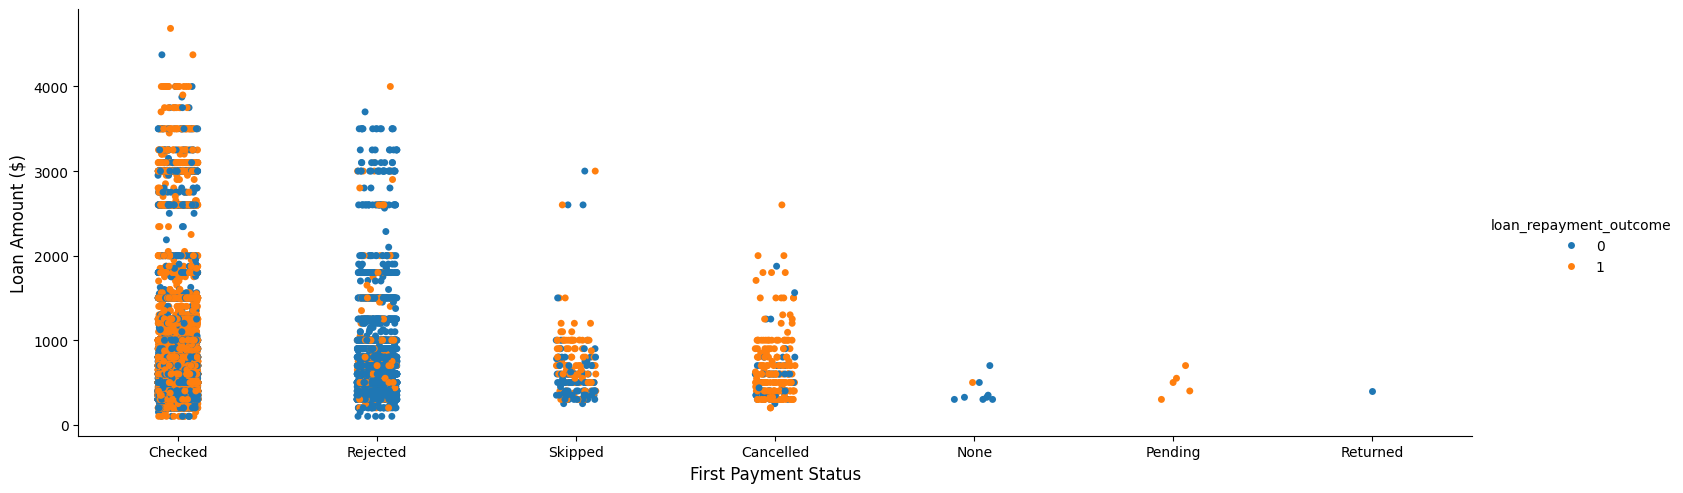

In [22]:
# Visualize the relationship between First Payment Status and Loan Amount 

sns.catplot(y="loanAmount", x="fpStatus", hue="loan_repayment_outcome", data=final_data, aspect = 3)
plt.xlabel("First Payment Status",fontsize=12)
plt.ylabel("Loan Amount ($)",fontsize=12)
plt.show()

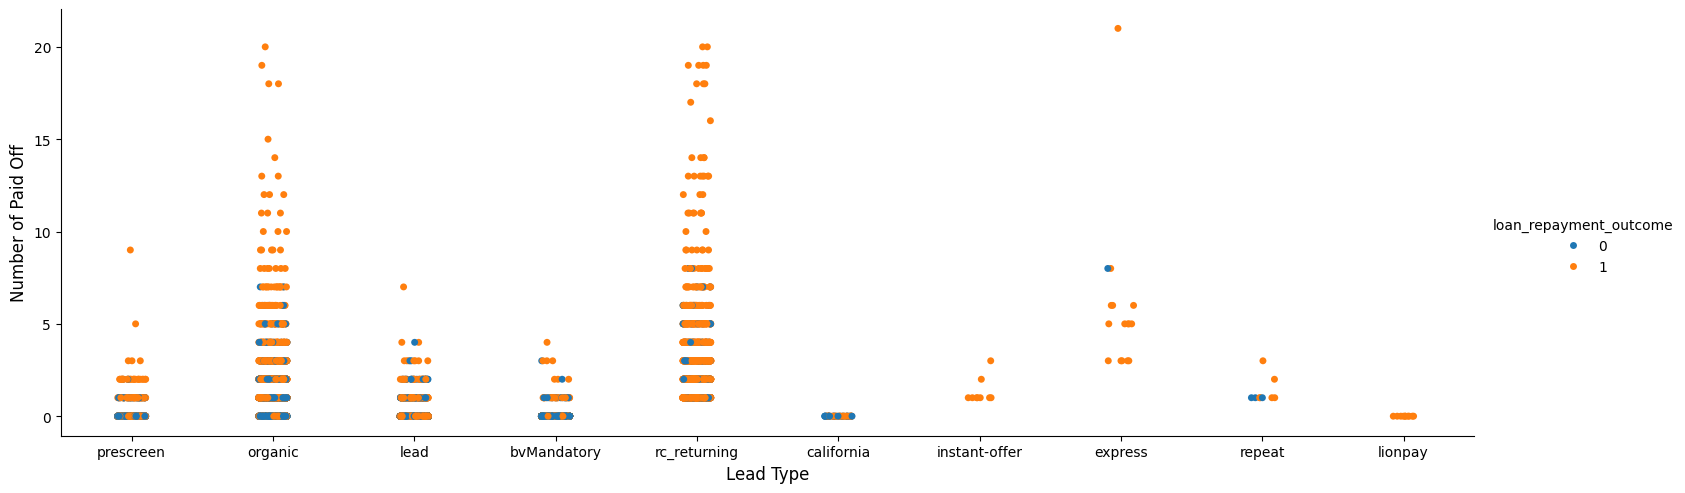

In [23]:
# Visualize the relationship between lead type and number of paid off in the past 

sns.catplot(y="nPaidOff", x="leadType", hue="loan_repayment_outcome", data=final_data, aspect = 3)
plt.xlabel("Lead Type",fontsize=12)
plt.ylabel("Number of Paid Off",fontsize=12)
plt.show()

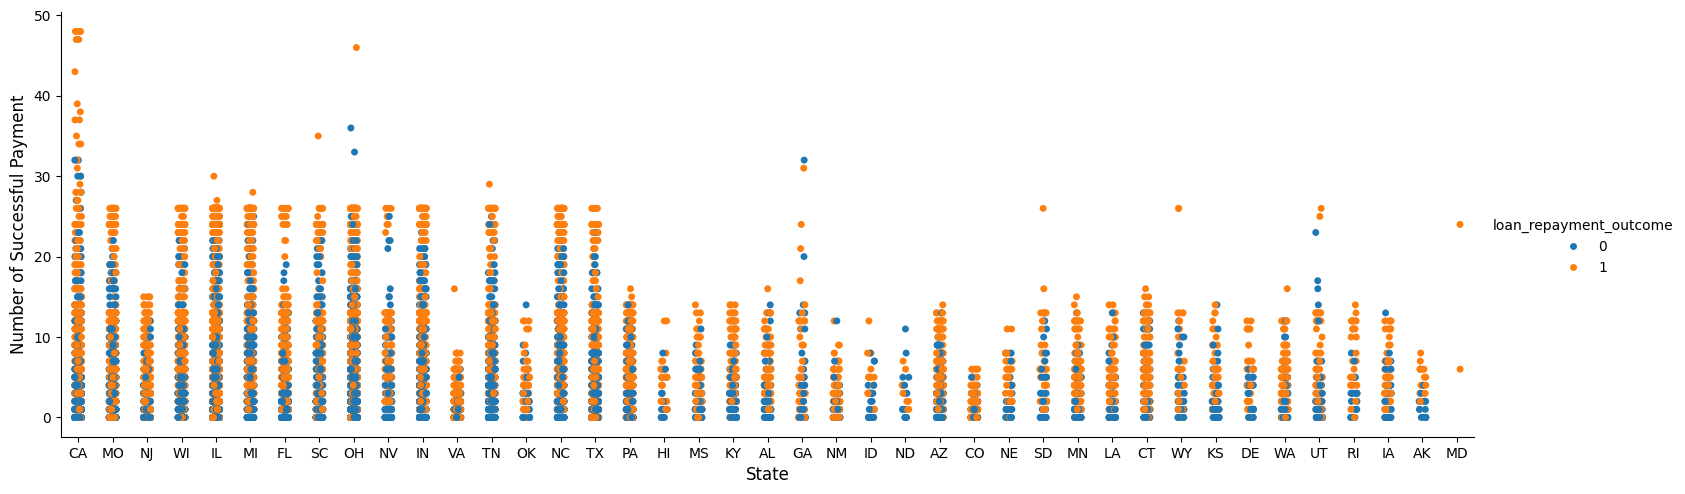

In [24]:
# Visualize the relationship between State and Number of Successful Payment

sns.catplot(y="numberSuccessfulPayment", x="state", hue="loan_repayment_outcome", data=final_data, aspect = 3)
plt.xlabel("State",fontsize=12)
plt.ylabel("Number of Successful Payment",fontsize=12)
plt.show()

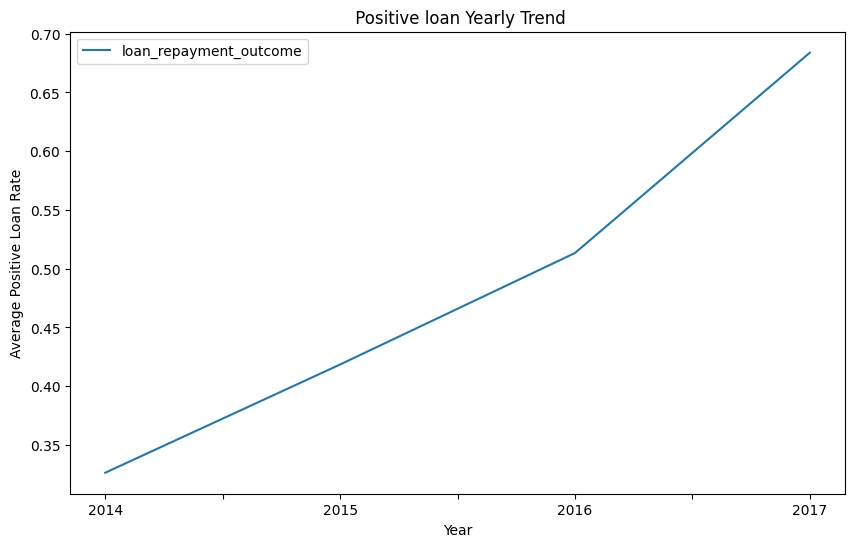

In [25]:
repayment_outcome_year = final_data[['Year', 'loan_repayment_outcome']]
repayment_outcome_yearly_trend = repayment_outcome_year.groupby('Year').mean() 

repayment_outcome_yearly_trend.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Average Positive Loan Rate')
plt.title(' Positive loan Yearly Trend')
plt.show()

In [26]:
# Check correlations between numeric variables with target variable (loan_repayment_outcome)

numeric_variables = final_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_variables.corr()
target_corr = correlation_matrix['loan_repayment_outcome']
print(target_corr)

apr                                -0.102352
nPaidOff                            0.174351
isFunded                                 NaN
loanAmount                          0.055411
originallyScheduledPaymentAmount    0.033241
leadCost                            0.033600
hasCF                              -0.058573
loan_repayment_outcome              1.000000
totalPaymentsMade                   0.353346
totalPaymentsAttempts              -0.141872
numberSuccessfulPayment             0.307776
numberCollectionPlan               -0.121819
clearfraudscore                     0.016437
Name: loan_repayment_outcome, dtype: float64


### Features Engineering

In [27]:
features = final_data[['payFrequency','nPaidOff','state','leadType','fpStatus','totalPaymentsMade','numberSuccessfulPayment']]
features_one_hot = pd.get_dummies(features[['payFrequency', 'state', 'leadType', 'fpStatus']])
features_encoded = pd.concat([features.drop(columns=['payFrequency', 'state', 'leadType', 'fpStatus']), features_one_hot], axis=1)
features_encoded.head()

,nPaidOff,totalPaymentsMade,numberSuccessfulPayment,payFrequency_B,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,state_AK,state_AL,...,leadType_prescreen,leadType_rc_returning,leadType_repeat,fpStatus_Cancelled,fpStatus_Checked,fpStatus_None,fpStatus_Pending,fpStatus_Rejected,fpStatus_Returned,fpStatus_Skipped
0,0.0,6287.08,22.0,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,2.0,481.39,7.0,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.0,0.00,0.0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2.0,1333.75,1.0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.0,2432.08,13.0,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [28]:
features_encoded = features_encoded.astype("float64")

In [29]:
#features_encoded.to_csv("features_encoded_data.csv", index=False)

## Modelling & Evaluation

In [30]:
Y = final_data['loan_repayment_outcome'].to_numpy()

In [31]:
X = preprocessing.StandardScaler().fit(features_encoded).transform(features_encoded)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)

In [33]:
Y_test.shape

(7797,)

#### Logistic regression

In [34]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
LR = LogisticRegression()

In [35]:
logreg_cv = GridSearchCV(LR, parameters, cv=5)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [36]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7541446208112875


In [37]:
logreg_cv_score = logreg_cv.score(X_test, Y_test)
print("Score : %.2f" %(logreg_cv_score*100),"%")

Score : 74.50 %


#### Decision Tree

In [38]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [39]:
tree_cv = GridSearchCV(estimator=tree, cv=5, param_grid=parameters)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [40]:
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.775084175084175


In [41]:
tree_cv_score = tree_cv.score(X_test, Y_test)
print("Score : %.2f" %(tree_cv_score*100),"%")

Score : 76.13 %


#### Support Vector Machine

In [42]:
# Create a smaller subset for hyperparameter tuning to have a quick grid search

X_train_subset, X_ignore, Y_train_subset, Y_ignore = train_test_split(
    X_train, Y_train, test_size=0.7, stratify=Y_train, random_state=42
) 

In [45]:
parameters = {'kernel':('linear', 'rbf'),
              'C': np.logspace(-1, 2, 3),
              'gamma': np.logspace(-2, 1, 3)}
svm = SVC()

In [46]:
svm_cv = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)
svm_cv.fit(X_train_subset, Y_train_subset)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([  0.1       ,   3.16227766, 100.        ]),
                         'gamma': array([ 0.01      ,  0.31622777, 10.        ]),
                         'kernel': ('linear', 'rbf')})

In [47]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(100.0), 'gamma': np.float64(0.01), 'kernel': 'rbf'}
accuracy : 0.7678246926777125


In [48]:
best_params = svm_cv.best_params_
svm_final = SVC(**best_params)
svm_final.fit(X_train, Y_train)

# Evaluate on the test set
svm_cv_score = svm_final.score(X_test, Y_test)
print("Score : %.2f" %(svm_cv_score*100),"%")

Score : 77.84 %


#### K Nearest Neighbors (KNN)

In [49]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [50]:
knn_cv = GridSearchCV(KNN, parameters, cv=5, n_jobs=-1)
knn_cv.fit(X_train_subset, Y_train_subset)

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [51]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1}
accuracy : 0.763121325494388


In [52]:
best_params = knn_cv.best_params_
knn_final = KNeighborsClassifier(**best_params)
knn_final.fit(X_train, Y_train)

knn_cv_score = knn_cv.score(X_test, Y_test)
print("Score : %.2f" %(knn_cv_score*100),"%")

Score : 75.30 %


In [53]:
list_cv = np.array([logreg_cv_score*100, svm_cv_score*100, tree_cv_score*100,knn_cv_score*100])
score_df = pd.DataFrame(data=list_cv, columns=['Test Accuracy'], index=['logreg', 'svm', 'tree', 'knn'])

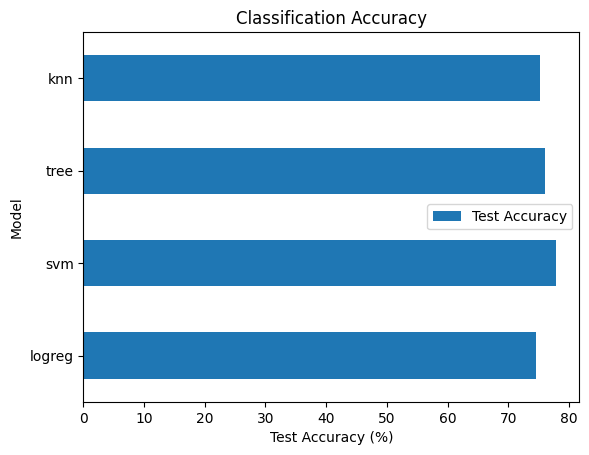

In [54]:
score_df.plot(kind='barh')

plt.xlabel('Test Accuracy (%)')
plt.ylabel('Model')
plt.title('Classification Accuracy') 

plt.show()

## Conclusion

In this project, I evaluated the performance of four classification models: K-Nearest Neighbors (KNN), Decision Tree, Logistic Regression and Support Vector Machine. All models yielded similar classification accuracies ranging from **74% to 78%**. This consistency across models suggests that the dataset may have underlying relationships that are captured effectively by various algorithms. 

### Final Thoughts

In conclusion, while KNN, Decision Tree, Logistic Regression and Support Vector Machine provide comparable accuracy on this dataset, further steps should include optimizing the models, exploring additional evaluation metrics, and considering ensemble methods to enhance predictive performance. The choice of the final model may also depend on interpretability and practical application in future scenarios.
